# Phân công

| MSSV    | Tên    | Công việc                         |
|---------|--------|-----------------------------------|
| 1712681 | Phương | Preprocessing, train              |
| 1712679 | Phước  | Target encoding, delete same rows |
| 1712594 | Minh   | Fill Na with mean, Delete null    |
| 1712695 | Quân   | Data visualization                |
| 1712674 | Phúc   | Correlation, Rescaling            |
| 1712156 | Thành  | Preprocessing, Test               |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
X_full = pd.read_csv('data/X_train.csv')
Y_full = pd.read_csv('data/Y_train.csv')

In [3]:
X_full.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,False,True,False,False,False,True,False,False,True,True
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,False
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,False,True,False,True,False,False,True,True,True,False
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,False,True,True,False,False,False,False,False,True,True
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,True


In [4]:
Y_full.head()

,id,price
0,1,15500.0
1,2,2800.0
2,3,16700.0
3,4,11000.0
4,5,6800.0


## Split train-val 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_full, Y_full, test_size=0.1, random_state=24)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(27000, 23) (27000, 2) (3000, 23) (3000, 2)


In [6]:
# Học từ tập Train, k học từ tập Val
X_df, Y_df = X_train.copy(), Y_train.copy()

## Count null values

In [7]:
X_df.isnull().sum()

id                0
manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    8
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
dtype: int64

## Delete null rows

In [8]:
def delete_null(X_df, Y_df):
    X = X_df.copy()
    Y = Y_df.copy()
    for c in X.columns:
        Y = Y.drop(Y[X[str(c)].isnull()].index)
        X = X.drop(X[X[str(c)].isnull()].index)
    return X, Y

X_df, Y_df = delete_null(X_df, Y_df)
print(X_df.shape, Y_df.shape)

(26992, 23) (26992, 2)


## Count unique values 

In [9]:
for c in X_full.columns:
    print(c, len(X_full[str(c)].unique()))

id 30000
manufacturer 50
model 992
transmission 2
color 12
odometer 5053
year 49
engineFuel 5
engineType 3
engineCapacity 58
bodyType 12
drivetrain 3
photos 59
feature_0 2
feature_1 2
feature_2 2
feature_3 2
feature_4 2
feature_5 2
feature_6 2
feature_7 2
feature_8 2
feature_9 2


# Data visualization
## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDF7D9F048>,
      dtype=object)

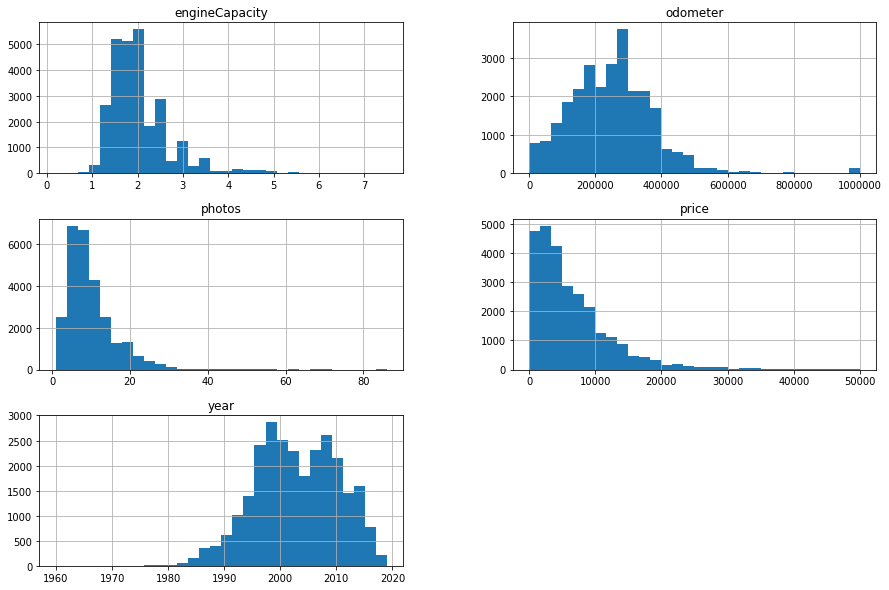

In [10]:
# gop X_df với trường price để dễ vẽ đồ thị
X_df = pd.concat([X_df, Y_df.price], axis=1)

# Lọc biến có dạng Numerical ra để xem xét
X_num_feature = X_df.select_dtypes(include=[np.number])
X_num_feature.pop('id')

# Vẽ đồ thị đơn giản dạng tần số (histogram)
X_num_feature.hist(figsize=(15, 10), bins=30, xlabelsize=10, ylabelsize=10)

### Price data

In [11]:
# Các thông số cơ bản
X_df['price'].describe()

count    26992.000000
mean      6605.592901
std       6086.752537
min          1.000000
25%       2300.000000
50%       4900.000000
75%       8999.000000
max      50000.000000
Name: price, dtype: float64

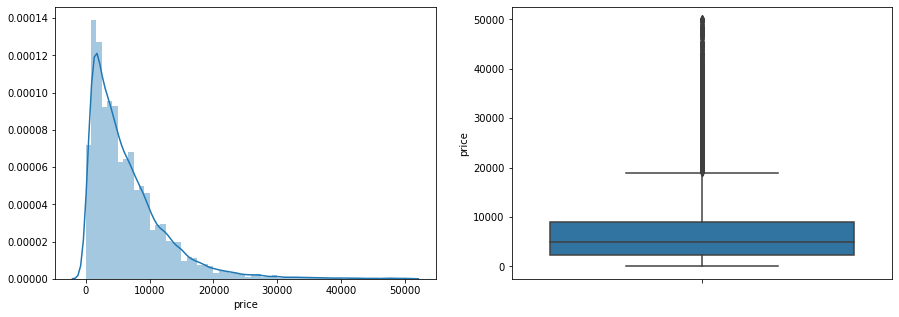

In [12]:
# Vẽ đồ thị hộp và cột
Pricefig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.distplot(X_df['price'], kde=True, bins=60,  ax=axs[0])
sns.boxplot( y=X_df['price'], orient='v' ,ax=axs[1])

Theo thống kê có giá max là 50000, min là 1 và trung bình là 6596.436659. \
Độ lệch chuẩn là 6092.176, khá lớn nên có thể suy ra biến price phân tán nhiều giá trị trong khoảng (0,50000).\
Dựa theo biểu đồ thấy biến này thuộc dạng skew right, nghiêng về khoảng giá trị là (0, 20000).

## Boolean data

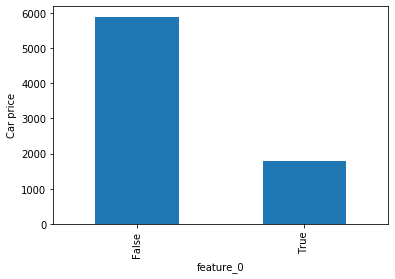

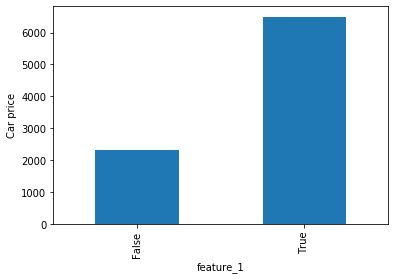

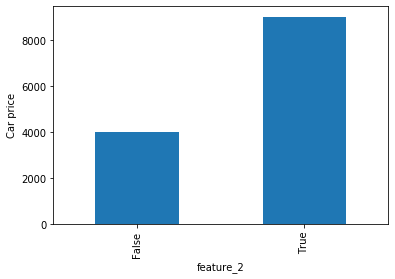

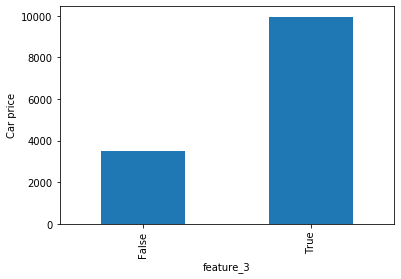

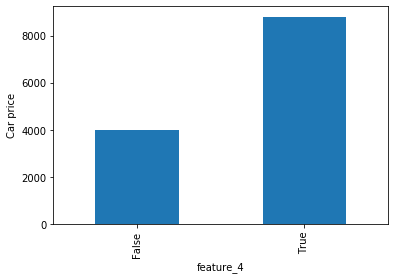

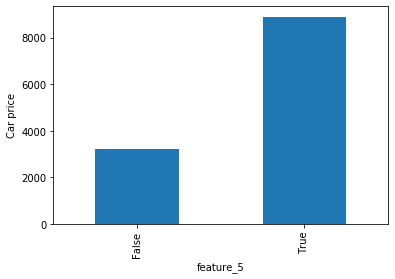

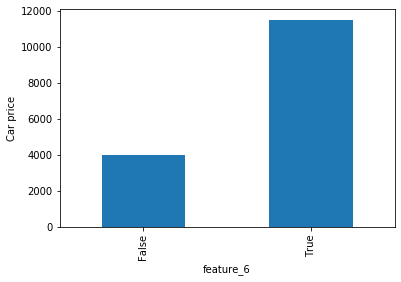

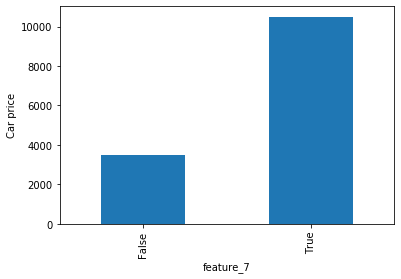

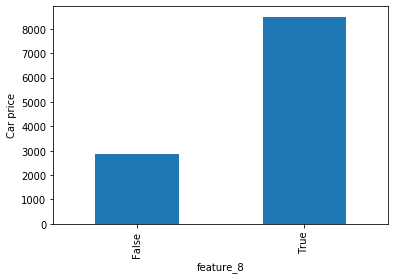

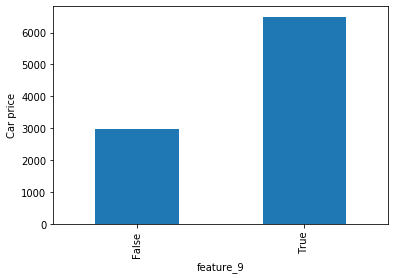

In [13]:
X_bool_feature = X_df.select_dtypes(include=[np.bool_])
for feature in X_bool_feature:
    data=X_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Car price')
    plt.show()

Có thể thấy các cặp đồ thì giống nhau là:
1. feature_8 và feature_5
2. feature_4 và feature_2
2. feature_3 và feature_7

## Categorical data

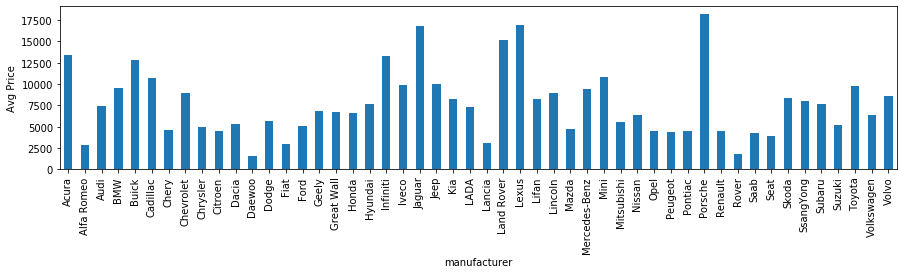

In [14]:
df_comp_avg_price = X_df[['manufacturer','price']].groupby("manufacturer", as_index = False).mean().rename(columns={'price':'manufacturer_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'manufacturer', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("manufacturer")
plt1.set_ylabel("Avg Price")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

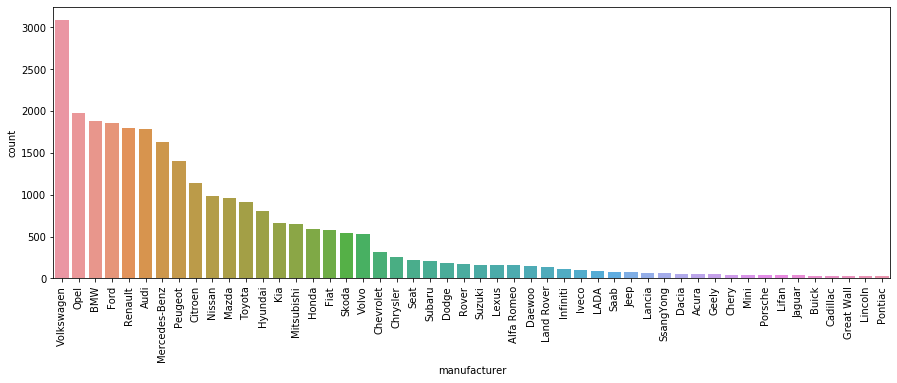

In [15]:
# Hãng xe và kiểu xe
plt.figure(figsize=(15, 5))
brand_chart = sns.countplot(data=X_df, order = X_df['manufacturer'].value_counts().index, x='manufacturer')
plt.xticks(rotation=90)

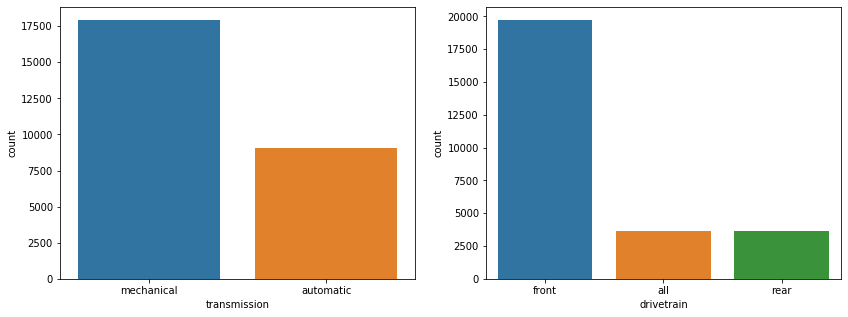

In [16]:
# Transmission và drivetrain
fig, axs = plt.subplots(ncols = 2, figsize=(14, 5))
sns.countplot(data=X_df, order = X_df['transmission'].value_counts().index, x='transmission', ax=axs[0])
sns.countplot(data=X_df, order = X_df['drivetrain'].value_counts().index, x='drivetrain', ax=axs[1])

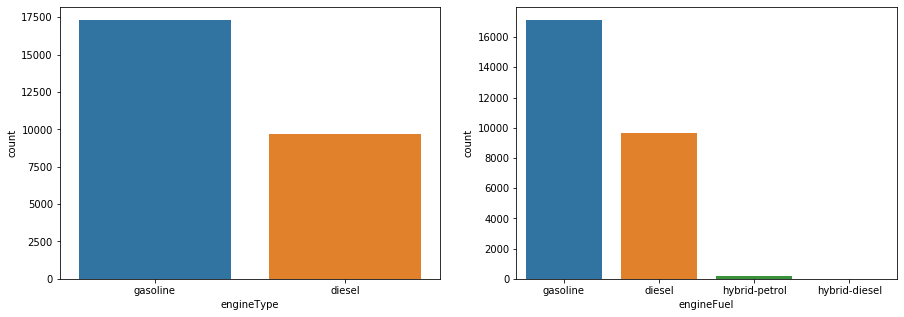

In [17]:
# engineFuel và engineType
fig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.countplot(data=X_df, order = X_df['engineType'].value_counts().index, x='engineType', ax=axs[0])
sns.countplot(data=X_df, order = X_df['engineFuel'].value_counts().index, x='engineFuel', ax=axs[1])

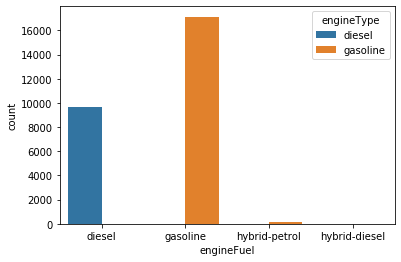

In [18]:
# Đồ thị quan hệ giữa engineFuel và engineType
sns.countplot(x='engineFuel', hue="engineType", data=X_df)

Có thể thấy nếu engineFuel là gasoline thì engineType là gasoline. \
Nếu engineFuel là diesel thì engineType là diesel. \
Nếu engineFuel là hybrid-petrol thì engineType là gasoline. \
Nếu engineFuel là hybrid-diesel thì engineType là gasoline. 

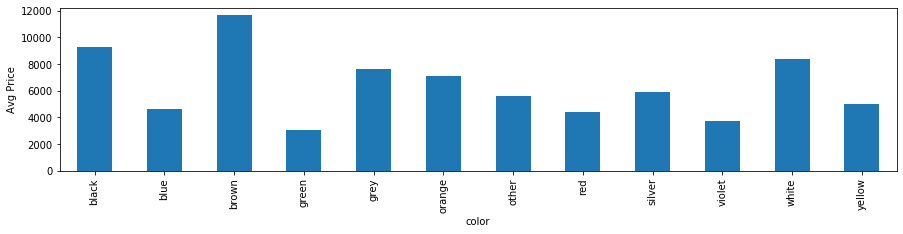

In [19]:
df_comp_avg_price = X_df[['color','price']].groupby("color", as_index = False).mean().rename(columns={'price':'color_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'color', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("color")
plt1.set_ylabel("Avg Price")
plt.show()

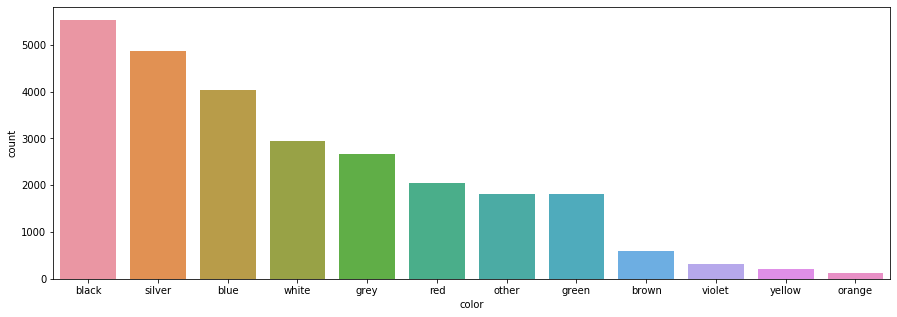

In [20]:
# Color
plt.figure(figsize=(15, 5))
sns.countplot(data=X_df, order = X_df['color'].value_counts().index, x='color')

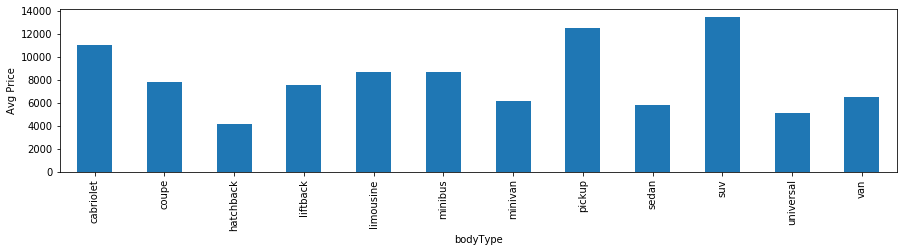

In [21]:
df_comp_avg_price = X_df[['bodyType','price']].groupby("bodyType", as_index = False).mean().rename(columns={'price':'bodyType_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'bodyType', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("bodyType")
plt1.set_ylabel("Avg Price")
plt.show()

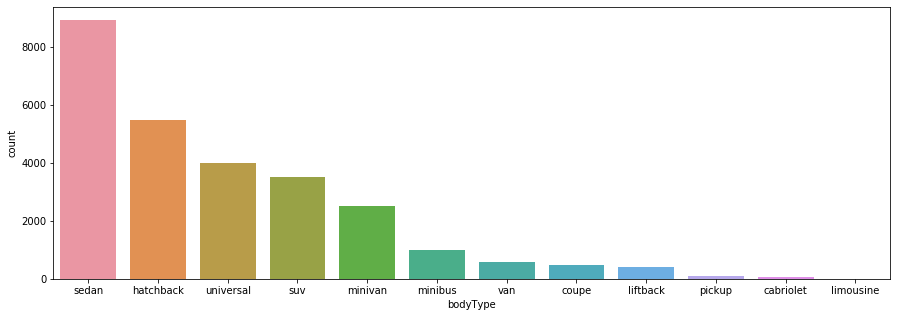

In [22]:
# Body type
plt.figure(figsize=(15, 5))
sns.countplot(data=X_df, order = X_df['bodyType'].value_counts().index, x='bodyType')

In [23]:
X_df.pop('price')

7468     4200.00
14707    3900.00
13320    8800.00
12026    1400.00
24150    5200.00
          ...   
19857    1700.00
24919    2499.00
14528     750.00
899       331.97
12706    1000.00
Name: price, Length: 26992, dtype: float64

# Data manipulation

## Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

# fit labelEncoders on X_full
labelEncoders= dict()
for c in X_full.columns:
    if len(X_full[str(c)].unique()) == 2:
        labelEncoder = LabelEncoder()
        labelEncoder.fit(X_full[str(c)])
        labelEncoders[str(c)] = labelEncoder
        
def apply_label(X):
    for col in labelEncoders:
        X[col] = labelEncoders[col].transform(X[col])
    return X
        
X_df = apply_label(X_df)

## One hot encoding

In [25]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
7468,7469,BMW,525,1,silver,444444,1998,diesel,diesel,2.5,...,0,1,1,0,1,0,0,0,1,1
14707,14708,Peugeot,407,0,yellow,222000,2004,gasoline,gasoline,2.0,...,0,0,1,1,0,1,0,0,1,1
13320,13321,Kia,Rio,1,brown,45000,2015,gasoline,gasoline,1.4,...,0,1,1,0,0,1,1,1,0,1
12026,12027,Fiat,Bravo,1,black,250000,2001,gasoline,gasoline,1.6,...,1,0,0,0,0,0,0,0,0,0
24150,24151,Audi,A4,1,blue,205000,2002,gasoline,gasoline,2.0,...,0,1,0,0,0,0,0,0,1,1


## Drop same features

In [26]:
sames = []

columns = X_df.columns
n = len(columns)
for i in range(n):
    for j in range(i + 1, n):
        if sum(X_df.iloc[:, i] == X_df.iloc[:, j])== X_df.shape[0]:
                sames.append((i, j))
                
sames

[]

In [27]:
column_numbers = list(range(X_df.shape[1]))
for s in sames:
    column_numbers.remove(s[0])
X_df = X_df.iloc[:, column_numbers]

## Check Duplicated Rows

In [28]:
sum(X_df.duplicated(subset = 'id')) == 0

True

## Target encoding

In [29]:
# gop X_df, Y_df
X_df = pd.concat([X_df, Y_df.price], axis=1)

In [30]:
# drivetrain
drivetrain_avg_price = X_df.groupby('drivetrain')['price'].mean()
X_df['drivetrain'] = X_df['drivetrain'].map(drivetrain_avg_price)

# engineType
engineType_avg_price = X_df.groupby('engineType')['price'].mean()
X_df['engineType'] = X_df['engineType'].map(engineType_avg_price)

# engineFuel
engineFuel_avg_price = X_df.groupby('engineFuel')['price'].mean()
X_df['engineFuel'] = X_df['engineFuel'].map(engineFuel_avg_price)

# Manufacturer
manufacturer_avg_price = X_df.groupby('manufacturer')['price'].mean()
X_df['manufacturer'] = X_df['manufacturer'].map(manufacturer_avg_price)


# Model
model_avg_price = X_df.groupby('model')['price'].mean()
X_df['model'] = X_df['model'].map(model_avg_price)


# Color
color_avg_price = X_df.groupby('color')['price'].mean()
X_df['color'] = X_df['color'].map(color_avg_price)


# BodyType
bodyType_avg_price = X_df.groupby('bodyType')['price'].mean()
X_df['bodyType'] = X_df['bodyType'].map(bodyType_avg_price)



X_df.pop('price')
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
7468,7469,9556.935269,5604.084323,1,5869.469093,444444,1998,7286.955799,7286.709034,2.5,...,0,1,1,0,1,0,0,0,1,1
14707,14708,4425.845779,5267.071889,0,5011.025600,222000,2004,6171.585469,6225.176228,2.0,...,0,0,1,1,0,1,0,0,1,1
13320,13321,8199.538649,7108.860708,1,11643.161609,45000,2015,6171.585469,6225.176228,1.4,...,0,1,1,0,0,1,1,1,0,1
12026,12027,2951.772337,1739.426981,1,9287.204257,250000,2001,6171.585469,6225.176228,1.6,...,1,0,0,0,0,0,0,0,0,0
24150,24151,7419.641818,7562.634934,1,4636.051583,205000,2002,6171.585469,6225.176228,2.0,...,0,1,0,0,0,0,0,0,1,1


## Rescaling Features

In [31]:
df = pd.concat([X_df, Y_df.price], axis=1)
df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
7468,7469,9556.935269,5604.084323,1,5869.469093,444444,1998,7286.955799,7286.709034,2.5,...,1,1,0,1,0,0,0,1,1,4200.0
14707,14708,4425.845779,5267.071889,0,5011.025600,222000,2004,6171.585469,6225.176228,2.0,...,0,1,1,0,1,0,0,1,1,3900.0
13320,13321,8199.538649,7108.860708,1,11643.161609,45000,2015,6171.585469,6225.176228,1.4,...,1,1,0,0,1,1,1,0,1,8800.0
12026,12027,2951.772337,1739.426981,1,9287.204257,250000,2001,6171.585469,6225.176228,1.6,...,0,0,0,0,0,0,0,0,0,1400.0
24150,24151,7419.641818,7562.634934,1,4636.051583,205000,2002,6171.585469,6225.176228,2.0,...,1,0,0,0,0,0,0,1,1,5200.0


In [32]:
df.describe()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
count,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,...,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000,26992.000000
mean,15003.744961,6605.592901,6605.592901,0.664271,6605.592901,252629.653490,2003.132928,6605.592901,6605.592901,2.054759,...,0.630113,0.232254,0.286011,0.247333,0.368072,0.177719,0.274785,0.433128,0.597436,6605.592901
std,8675.055055,2400.555843,4711.979615,0.472253,2141.033335,131187.397884,7.532020,655.746833,509.035886,0.665015,...,0.482783,0.422278,0.451903,0.431470,0.482290,0.382283,0.446414,0.495517,0.490423,6086.752537
min,1.000000,1612.826389,237.120000,0.000000,3026.611445,1.000000,1960.000000,4900.000000,6225.176228,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7497.750000,4558.893071,3424.873547,0.000000,4636.051583,163000.000000,1998.000000,6171.585469,6225.176228,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2300.000000
50%,14983.000000,6412.835783,5516.689259,1.000000,5869.469093,250000.000000,2003.000000,6171.585469,6225.176228,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4900.000000
75%,22529.250000,8199.538649,8785.100139,1.000000,8348.181655,325596.250000,2009.000000,7286.955799,7286.709034,2.225000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,8999.000000
max,30000.000000,18193.445122,50000.000000,1.000000,11643.161609,1000000.000000,2019.000000,11188.549568,7286.709034,7.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000


In [33]:
# chọn Odometer dùng Gauss Rescaling
# Year, engineCapacity, photos dùng Min max Rescaling vì có độ lệch chuẩn lớn
# Manufacturer, model, color, bodyType, engineType, engineFuel dung minmax rescaling vì có độ lệch chuẩn lớn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
minmax_vars = ['year', 'engineCapacity', 'photos', 'manufacturer', 'model', 'color', 'bodyType', 'engineFuel', 'engineType', 'transmission']
minmax_scaler.fit(X_df[minmax_vars])
X_df[minmax_vars] = minmax_scaler.transform(X_df[minmax_vars])

standard_scaler = StandardScaler()
standard_vars = ['odometer', 'drivetrain']
standard_scaler.fit(X_df[standard_vars])
X_df[standard_vars] = standard_scaler.transform(X_df[standard_vars])

In [34]:
# gop X_df, Y_df
df = pd.concat([X_df, Y_df.price], axis=1)
df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
7468,7469,0.479120,0.107851,1.0,0.329930,1.462167,0.644068,0.379572,1.0,0.315068,...,1,1,0,1,0,0,0,1,1,4200.0
14707,14708,0.169657,0.101078,0.0,0.230303,-0.233484,0.745763,0.202206,0.0,0.246575,...,0,1,1,0,1,0,0,1,1,3900.0
13320,13321,0.397254,0.138090,1.0,1.000000,-1.582724,0.932203,0.202206,0.0,0.164384,...,1,1,0,0,1,1,1,0,1,8800.0
12026,12027,0.080754,0.030189,1.0,0.726578,-0.020045,0.694915,0.202206,0.0,0.191781,...,0,0,0,0,0,0,0,0,0,1400.0
24150,24151,0.350217,0.147208,1.0,0.186785,-0.363072,0.711864,0.202206,0.0,0.246575,...,1,0,0,0,0,0,0,1,1,5200.0


## Correlation

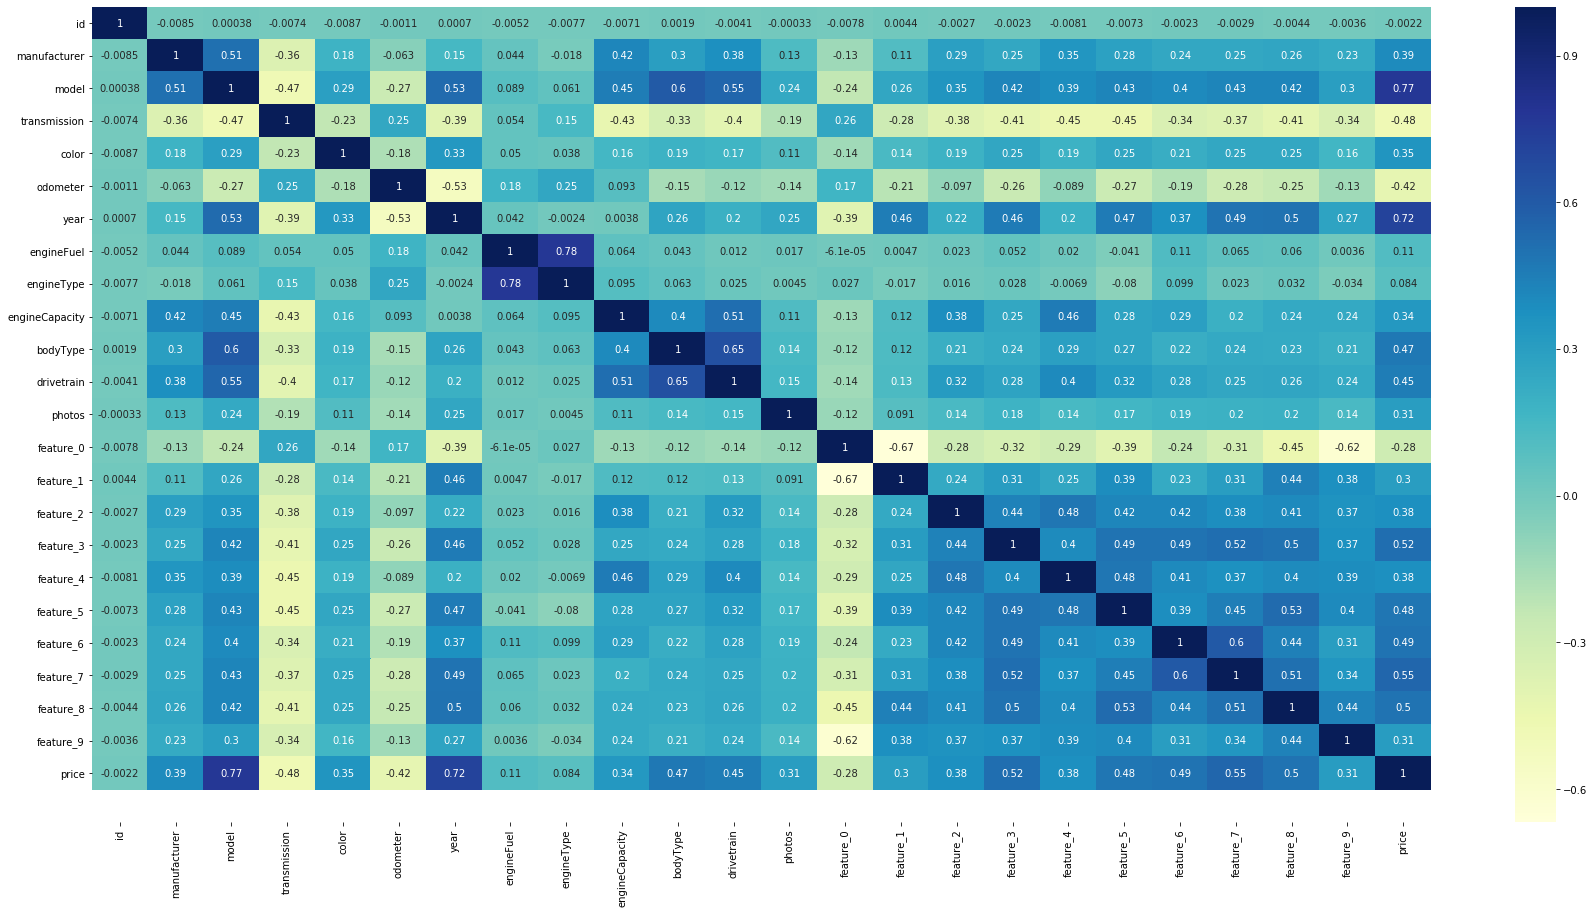

<Figure size 432x288 with 0 Axes>

In [35]:
df = pd.concat([X_df, Y_df.price], axis=1)
plt.figure(figsize = (30, 15))
ax = sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
ax.set_ylim(25, 0)
plt.show()
plt.tight_layout()

Chọn ngưỡng 0.2.\
loại engineType, engineFuel

In [36]:
X_df.pop("engineFuel")
X_df.pop("engineType")

7468     1.0
14707    0.0
13320    0.0
12026    0.0
24150    0.0
        ... 
19857    0.0
24919    0.0
14528    0.0
899      0.0
12706    1.0
Name: engineType, Length: 26992, dtype: float64

# Preprocessing

In [37]:
mean_drivetrain = X_df['drivetrain'].mean()
mean_model = X_df['model'].mean()
mean_manufacturer = X_df['manufacturer'].mean()
mean_color = X_df['color'].mean()
mean_bodyType = X_df['bodyType'].mean()

In [38]:
def preprocessing(X_df, Y_df):
    X = X_df.copy()
    Y = Y_df.copy()
    
    Y = Y.drop(Y[X['engineCapacity'].isnull()].index)
    X = X.drop(X[X['engineCapacity'].isnull()].index)
    
    X = apply_label(X)
    
    
    X['engineFuel'] = X['engineFuel'].map(engineFuel_avg_price)
    X['engineType'] = X['engineType'].map(engineType_avg_price)
    X['drivetrain'] = X['drivetrain'].map(drivetrain_avg_price)
    X['manufacturer'] = X['manufacturer'].map(manufacturer_avg_price)
    X['model'] = X['model'].map(model_avg_price)
    X['color'] = X['color'].map(color_avg_price)
    X['bodyType'] = X['bodyType'].map(bodyType_avg_price)
    
    X[minmax_vars] = minmax_scaler.transform(X[minmax_vars])
    X[standard_vars] = standard_scaler.transform(X[standard_vars])
        
    X.pop('id')
    Y.pop('id')
    
    X.pop("engineType")
    X.pop("engineFuel")
    
    X['drivetrain'] = X['drivetrain'].fillna(mean_drivetrain)
    X['model'] = X['model'].fillna(mean_model)
    X['manufacturer'] = X['manufacturer'].fillna(mean_manufacturer)
    X['color'] = X['color'].fillna(mean_color)
    X['bodyType'] = X['bodyType'].fillna(mean_bodyType)

    return X,Y

# Train

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
def RMSE(model, X, Y, transform):
    return np.sqrt(mean_squared_error(np.array(Y), model.predict(transform(X))))

In [41]:
def transform(X):
    float_feature = ['model', 'manufacturer', 'color', 'odometer', 'year', 'engineCapacity', 
                     'bodyType', 'photos', 'drivetrain']
    X_transform = [[1]*len(X)]

    i = 0
    for c in X.columns:
        X_array = np.array(X[c])
        X_transform.append(X_array)
    for f in float_feature:
        X_array = np.array(X[f])
        X_transform.append(np.tanh(X_array))
        X_transform.append(X_array**4)
        X_transform.append(X_array**5)
        X_transform.append(X_array**6)
        X_transform.append(np.log(1 + np.abs(X_array)))
        X_transform.append(np.log(1 + np.abs(X_array))/np.log(3))
        X_transform.append(np.log(1 + np.abs(X_array))/np.log(4))
        X_transform.append(np.log2(1 + np.abs(X_array)))
        X_transform.append(np.sqrt(np.abs(X_array)))
        X_transform.append(np.sqrt(np.exp(X_array)))
        X_transform.append(np.sqrt(np.exp(-X_array)))
        X_transform.append(np.sqrt(np.pi**(X_array)))
        X_transform.append(np.sqrt(np.pi**(-X_array)))
        X_transform.append(2**np.sqrt(np.abs(X_array)))
        X_transform.append(2**(X_array))
        X_transform.append(2**(-X_array))
        X_transform.append(np.pi**(X_array))
        X_transform.append(np.pi**(-X_array))
        X_transform.append(np.sqrt(2**(X_array)))
        X_transform.append(np.sqrt(2**(-X_array)))
        X_transform.append(np.exp(X_array))
        X_transform.append(np.exp(-X_array))
        X_transform.append(np.sin(X_array))
        X_transform.append(np.cos(X_array))
        X_transform.append(np.sin(-X_array))
        X_transform.append(np.sin(X_array)**2)
        X_transform.append(np.cos(X_array)**2)
        X_transform.append(np.sin(X_array)*np.cos(X_array))
        X_transform.append(np.sin(np.cos(X_array)))
        X_transform.append(np.cos(np.sin(X_array)))
        X_transform.append(np.cos(np.cos(X_array)))
        X_transform.append(np.sin(np.sin(X_array)))
        
    for f1 in float_feature:
        for f2 in float_feature:
            X1_array = np.array(X[f1])
            X2_array = np.array(X[f2])
            X_transform.append(X1_array*X2_array)
            X_transform.append(np.cos(X1_array + X2_array))
            X_transform.append(np.sin(X1_array + X2_array))
            X_transform.append(np.exp(X1_array + X2_array))
             
            
    for f1 in float_feature:
        for f2 in float_feature:
            for f3 in float_feature:
                X1_array = np.array(X[f1])
                X2_array = np.array(X[f2])
                X3_array = np.array(X[f3])
                X_transform.append(X1_array*X2_array*X3_array)
                
    X_transform = np.array(X_transform).T
    
    return X_transform

In [42]:
X_train, Y_train = preprocessing(X_train, Y_train)

In [43]:
model = LinearRegression().fit(transform(X_train), Y_train)

print("train error:", RMSE(model, X_train, Y_train, transform))

train error: 1879.146262768043


In [44]:
X_val, Y_val = preprocessing(X_val, Y_val)

print("validation error:", RMSE(model, X_val, Y_val, transform))

validation error: 2115.214194394796


In [45]:
model.predict(transform(X_val))

array([[   47.09313965],
       [ 6054.18933105],
       [ 4049.16821289],
       ...,
       [ 2314.53222656],
       [12660.9979248 ],
       [ 5846.98852539]])

In [46]:
Y_val

,price
25706,224.08
2412,6500.00
13346,4000.00
23685,12970.00
9943,17000.00
...,...
25277,9800.00
13101,2500.00
22603,1600.00
1929,10100.00


In [47]:
# r2 score
model.score(transform(X_train), Y_train)

0.9046839649294235

In [48]:
model.score(transform(X_val), Y_val)

0.8813276329396174